# Assignment 4: Becoming an Independent Data Scientist

## 1. Region and Domain of Datasets
State the region and the domain category that your data sets are about

Region: Toronto, Ontario, Canada <br> Domain category: Sports and Athletics

## 2. Research Question
Win percentage of Toronto Raptors and home game attendence rate over the last 10 years. 

## 3. Links of Datasets
https://www.basketball-reference.com/teams/TOR/ <br> http://www.espn.com/nba/attendance/_/sort/homeTotal


# Source Code for the visual

In [39]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# import the two datasets to dataframes
df_win_record = pd.read_csv('raptors win record.txt')
df_attendence = pd.read_csv('raptors attendence.txt')

In [41]:
# clean up the two dataframes
df_win_record = df_win_record.drop(['Unnamed: 8', 'Unnamed: 15'], axis = 1)
df_win_record = df_win_record.iloc[0:10]
df_win_record['Year'] = [2020,2019,2018,2017,2016,2015,2014,2013,2012,2011]
df_win_record.set_index('Year', inplace = True)

df_attendence.rename(columns = df_attendence.iloc[0],inplace = True)
df_attendence.set_index('Year', inplace = True)
df_attendence.drop('Year', inplace = True)
df_attendence.index = df_attendence.index.map(int)
df_attendence['TOTAL'] = df_attendence['TOTAL'].astype(int)

<IPython.core.display.Javascript object>


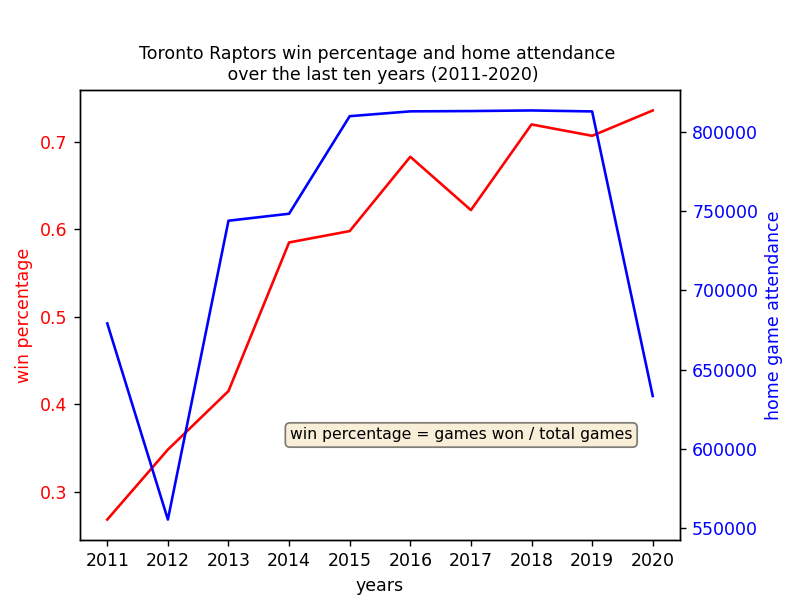

In [57]:
# plot the first dataset using index as the values of x-axis and 'W/L%' column as the y-axis

fig, ax1 = plt.subplots()
ax1.set_xlabel('years')

ax1.set_ylabel('win percentage', color = 'red')
ax1.plot(df_win_record.index, df_win_record['W/L%'], '-', color ='red')
ax1.tick_params(axis='y', labelcolor = 'red')

# plot the second dataset using index as the x-axis and 'TOTAL' column as the secondary y-axis

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('home game attendance', color = 'blue') 
ax2.plot(df_attendence.index, df_attendence['TOTAL'], '-', color = 'blue')
ax2.tick_params(axis='y', labelcolor = 'blue')
plt.xticks(df_attendence.index);

In [58]:
# adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(top = 0.85, bottom=0.1, left = 0.1, right = 0.85)
# add a text box
textstr = 'win percentage = games won / total games'
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in bottom center in axes coords
ax2.text(0.35, 0.25, textstr, transform=ax2.transAxes, fontsize=9,
        verticalalignment='top', bbox=props)
#title
plt.title('Toronto Raptors win percentage and home attendance \n over the last ten years (2011-2020)', fontsize = 10);

In [59]:
#save image
plt.savefig('assignment4_specialization_second.pdf')